# 7. Fourier Transforms
https://docs.scipy.org/doc/scipy/reference/tutorial/index.html   
https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to light in its current form by Cooley and Tukey [CT65]. Press et al. [NR07] provide an accessible introduction to Fourier analysis and its applications.

## Fast Fourier transforms
### One dimensional discrete Fourier transforms

The FFT y[k] of length N of the length-N sequence x[n] is defined as
> $y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, ,$

and the inverse transform is defined as follows
> $x[n] = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, .$

These transforms can be calculated by means of fft and ifft, respectively as shown in the following example.

In [4]:
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.50000000+0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [5]:
yinv = ifft(y)
yinv

array([ 1.0+0.j,  2.0+0.j,  1.0+0.j, -1.0+0.j,  1.5+0.j])

From the definition of the FFT it can be seen that
> $y[0] = \sum_{n=0}^{N-1} x[n] \, .$

In the example

In [6]:
np.sum(x)

4.5

which corresponds to y[0]y[0]. For N even, the elements y[1]...y[N/2−1] contain the positive-frequency terms, and the elements y[N/2]...y[N−1]y[N/2]...y[N−1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N−1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N−1] contain the negative- frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of y[n] for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.

The example plots the FFT of the sum of two sines.

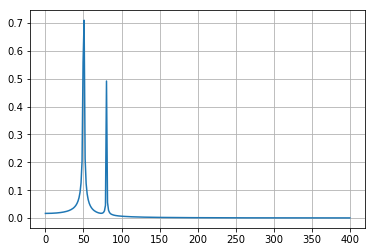

In [18]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)
xf = np.linspace(0.0, 0.5*(1./T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

The FFT input signal is inherently truncated. This truncation can be modelled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form sin(x)/x. This convolution is the cause of an effect called ***spectral leakage*** (see [WPW]). Windowing the signal with a dedicated window function helps mitigate spectral leakage. The example below uses a ***Blackman window*** from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).

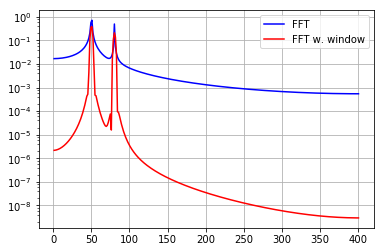

In [28]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In case the sequence x is complex-valued, the spectrum is no longer symmetric. To simplify working wit the FFT functions, scipy provides the following two helper functions.

The function fftfreq returns the FFT sample frequency points.

In [36]:
from scipy.fftpack import fftfreq
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In a similar spirit, the function fftshift allows swapping the lower and upper halves of a vector, so that it becomes suitable for display.

In [32]:
from scipy.fftpack import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

The example below plots the FFT of two complex exponentials; note the asymmetric spectrum.

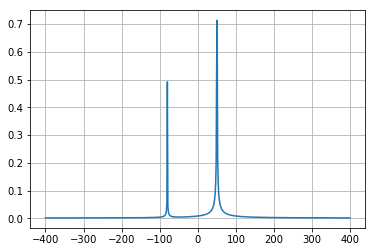

In [34]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

The function ***rfft*** calculates the FFT of a real sequence and outputs the FFT coefficients y[n] with separate real and imaginary parts.  

In case of N being even:   
$[y[0], Re(y[1]), Im(y[1]),..., Re(y[N/2])]$;   

in case N being odd:  
$[y[0], Re(y[1]),Im(y[1]),..., Re(y[N/2]),
Im(y[N/2])]$

The corresponding function ***irfft*** calculates the IFFT of the FFT coefficients with this special ordering.

In [38]:
from scipy.fftpack import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)

array([ 5.50+0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.50+0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [39]:
yr = rfft(x)
yr

array([ 5.5       ,  2.25      , -0.4330127 , -2.75      , -1.29903811,
        1.5       ])

In [40]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [41]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
fft(x)

array([ 4.50000000+0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [42]:
yr = rfft(x)
yr

array([ 4.5       ,  2.08155948, -1.65109876, -1.83155948,  1.60822041])

### Two and n-dimensional discrete Fourier transforms

The functions ***fft2 and ifft2*** provide 2-dimensional FFT, and IFFT, respectively. Similar, ***fftn and ifftn*** provide n-dimensional FFT, and IFFT, respectively.

The example below demonstrates a 2-dimensional IFFT and plots the resulting (2-dimensional) time-domain signals.

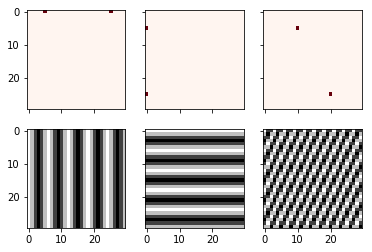

In [43]:
from scipy.fftpack import ifftn
import matplotlib.cm as cm

N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()

### FFT convolution

scipy.fftpack.convolve performs a convolution of two one-dimensional arrays in frequency domain.

## Discrete Cosine Transforms
Scipy provides a DCT with the function dct and a corresponding IDCT with the function idct. There are 8 types of the DCT [WPC], [Mak]; however, only the first 3 types are implemented in scipy. “The” DCT generally refers to DCT ***type 2***, and “the” Inverse DCT generally refers to DCT ***type 3***. In addition, the DCT coefficients can be normalized differently (for most types, scipy provides None and ortho). Two parameters of the dct/idct function calls allow setting the DCT type and coefficient normalization.

For a single dimension array x, dct(x, norm=’ortho’) is equal to MATLAB dct(x).

### Type I DCT

Scipy uses the following definition of the unnormalized DCT-I (norm='None'):
> $\begin{split}y[k] = x_0 + (-1)^k x_{N-1} + 2\sum_{n=1}^{N-2} x[n]
\cos\left({\pi nk\over N-1}\right),
\qquad 0 \le k < N.\end{split}$

Only None is supported as normalization mode for DCT-I. Note also that the DCT-I is only supported for input size > 1

### Type II DCT

Scipy uses the following definition of the unnormalized DCT-II (norm='None'):
> $\begin{split}y[k] = 2 \sum_{n=0}^{N-1} x[n] \cos \left({\pi(2n+1)k \over 2N} \right)
\qquad 0 \le k < N.\end{split}$

In case of the normalized DCT (norm='ortho'), the DCT coefficients y[k] are multiplied by a scaling factor f:
> $\begin{split}f = \begin{cases} \sqrt{1/(4N)}, & \text{if $k = 0$} \\    \sqrt{1/(2N)},
& \text{otherwise} \end{cases} \, .\end{split}$

In this case, the DCT “base functions” $\phi_k[n] = 2 f \cos
\left({\pi(2n+1)k \over 2N} \right)$  become orthonormal:
> $\sum_{n=0}^{N-1} \phi_k[n] \phi_l[n] = \delta_{lk}$

### Type III DCT

Scipy uses the following definition of the unnormalized DCT-III (norm='None'):
> $\begin{split}y[k] = x_0 + 2 \sum_{n=1}^{N-1} x[n] \cos\left({\pi n(2k+1) \over 2N}\right)
\qquad 0 \le k < N,\end{split}$

or, for norm='ortho':
> $\begin{split}y[k] = {x_0\over\sqrt{N}} + {2\over\sqrt{N}} \sum_{n=1}^{N-1} x[n]
\cos\left({\pi n(2k+1) \over 2N}\right) \qquad 0 \le k < N.\end{split}$

### DCT and IDCT

The (unnormalized) DCT-III is the inverse of the (unnormalized) DCT-II, up to a factor 2N. The orthonormalized DCT-III is exactly the inverse of the orthonormalized DCT- II. The function idct performs the mappings between the DCT and IDCT types.

The example below shows the relation between DCT and IDCT for different types and normalizations.

In [44]:
from scipy.fftpack import dct, idct

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

 # scaling factor 2*N = 10
idct(dct(x, type=2), type=2)

 # no scaling factor
idct(dct(x, type=2, norm='ortho'), type=2, norm='ortho')

 # scaling factor 2*N = 10
idct(dct(x, type=3), type=3)

 # no scaling factor
idct(dct(x, type=3, norm='ortho'), type=3, norm='ortho')

 # scaling factor 2*(N-1) = 8
idct(dct(x, type=1), type=1) 

array([  8.,  16.,   8.,  -8.,  12.])

### Example

The DCT exhibits the “energy compaction property”, meaning that for many signals only the first few DCT coefficients have significant magnitude. Zeroing out the other coefficients leads to a small reconstruction error, a fact which is exploited in lossy signal compression (e.g. JPEG compression).

The example below shows a signal x and two reconstructions (x20x20 and x15x15)from the signal’s DCT coefficients. The signal x20 is reconstructed from the first 20 DCT coefficients, x15 is reconstructed from the first 15 DCT coefficients. It can be seen that the relative error of using 20 coefficients is still very small (~0.1%), but provides a five-fold compression rate.

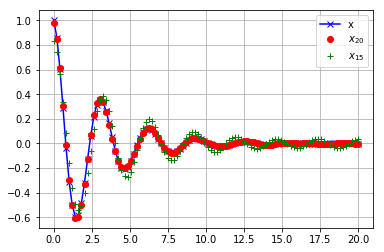

In [46]:
from scipy.fftpack import dct, idct

N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
plt.plot(t, x, '-bx')

y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
# 0.0010901402257
plt.plot(t, yr, 'ro')

window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
# 0.0718818065008
plt.plot(t, yr, 'g+')

plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()

## Discrete Sine Transforms
Scipy provides a DST [Mak] with the function dst and a corresponding IDST with the function idst.

There are theoretically 8 types of the DST for different combinations of even/odd boundary conditions and boundary off sets [WPS], only the first 3 types are implemented in scipy.

### Type I DST

DST-I assumes the input is odd around n=-1 and n=N. Scipy uses the following definition of the unnormalized DST-I (norm='None'):
> $\begin{split}y[k] = 2\sum_{n=0}^{N-1} x[n]  \sin\left( \pi {(n+1) (k+1)}\over{N+1}
\right), \qquad 0 \le k < N.\end{split}$

Only None is supported as normalization mode for DST-I. Note also that the DST-I is only supported for input size > 1. The (unnormalized) DST-I is its own inverse, up to a factor 2(N+1).

### Type II DST

DST-II assumes the input is odd around n=-1/2 and even around n=N. Scipy uses the following definition of the unnormalized DST-II (norm='None'):
> $\begin{split}y[k] = 2 \sum_{n=0}^{N-1} x[n]  \sin\left( {\pi (n+1/2)(k+1)} \over N
\right), \qquad 0 \le k < N.\end{split}$


### Type III DST

DST-III assumes the input is odd around n=-1 and even around n=N-1. Scipy uses the following definition of the unnormalized DST-III (norm='None'):
> $\begin{split}y[k] = (-1)^k x[N-1] + 2 \sum_{n=0}^{N-2} x[n] \sin \left( {\pi
(n+1)(k+1/2)} \over N \right), \qquad 0 \le k < N.\end{split}$


### DST and IDST

The example below shows the relation between DST and IDST for different types and normalizations.

In [47]:
from scipy.fftpack import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
 # scaling factor 2*N = 10
idst(dst(x, type=2), type=2)

 # no scaling factor
idst(dst(x, type=2, norm='ortho'), type=2, norm='ortho')

 # scaling factor 2*N = 10
idst(dst(x, type=3), type=3)

 # no scaling factor
idst(dst(x, type=3, norm='ortho'), type=3, norm='ortho')

 # scaling factor 2*(N+1) = 8
idst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])

## Cache Destruction
To accelerate repeat transforms on arrays of the same shape and dtype, scipy.fftpack keeps a cache of the prime factorization of length of the array and pre-computed trigonometric functions. These caches can be destroyed by calling the appropriate function in ***scipy.fftpack._fftpack.dst(type=1)*** and ***idst(type=1)*** share a cache (*dst1_cache). As do dst(type=2), dst(type=3), idst(type=3), and idst(type=3) (*dst2_cache).